In [2]:
% matplotlib inline
import psycopg2
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import random_projection
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import graphviz
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import itertools

## Data processing

In [126]:
df_scenery_coordinates = pd.read_pickle(r'C:/Users/parha/Google Drive/My projects/Thesis/Outputs/Discrete Choice Model/Data Prep/coordinates_choice_scenery.pkl')
df_scenery_coordinates.slope = df_scenery_coordinates.slope.astype('float64')
df_aggreagate = df_scenery_coordinates.groupby(by = ['trip_index'])
df_scenery_coordinates_processed = df_scenery_coordinates[df_scenery_coordinates.trip_index.isin(df_wide.trip_index)]

In [3]:
df_wide = pd.read_csv(r"C:\Users\parha\Google Drive\My projects\Thesis\Outputs\Discrete Choice Model\Models\Test and train\17-6-2018\df_wide_1.csv")

In [5]:
df_wide_train=df_wide.sample(frac=0.85,random_state=200)
df_wide_test= df_wide.drop(df_wide_train.index)
df_wide_train.to_csv(r'C:\Users\parha\Google Drive\My projects\Thesis\Outputs\Discrete Choice Model\Models\Test and train\17-6-2018\df_wide_train.csv')
df_wide_test.to_csv(r'C:\Users\parha\Google Drive\My projects\Thesis\Outputs\Discrete Choice Model\Models\Test and train\17-6-2018\df_wide_test.csv')

In [4]:
var_names = ['trip_index',
 'trip_id',
 'travel_mode_work',
 'travel_mode_alt_work',
 'sex',
 'travel_mode_study',
 'travel_mode_alt_study',
 'age_45_54',
 'age_35_44',
 'age_25_34',
 'age_16_24',
 'age_55_64',
 'age_65',
 'purpose_education',
 'purpose_health',
 'purpose_other',
 'purpose_meal_snack_coffee',
 'purpose_leisure',
 'purpose_pick_up',
 'choice']
col = list(df_wide.columns)
new = []
for name in col:
    if name[-1].isdigit():
        new.append(name[:-2])
stubname = list(set(new[6:]))
df_long = pd.wide_to_long(df_wide, i = var_names, j = 'alternative_no', stubnames = stubname,sep = '_')


In [5]:
df_long.reset_index(inplace=True)

In [6]:
df_long.alternative_no = df_long.alternative_no.astype(int)
df_long.at[df_long.choice == df_long.alternative_no,'action' ]= 1
df_long.action.fillna(value= 0 ,inplace= True)
df = df_long[df_long.columns.difference(['polyline','uuid'])]
df = df.astype(float)
# df.drop(columns=(df.filter(like = 'ps').columns),inplace=True) # omitting PS factor
# df.drop(columns=(df.filter(like = 'ps').columns),inplace=True) # droping av labels, all of them equal 1
df.drop(columns=(df.filter(like = 'id').columns),inplace=True) # droping trip_id and id
df.drop(columns =['choice','overlap_percentage'],inplace=True)
df.drop(columns=['av1','av2','av3'],inplace=True)
df.dropna(axis = 1,inplace=True)


In [9]:
df_y = df[['trip_index','action']]
df_x = df.drop(columns= ['action'])
df_x.reset_index(inplace=True)
df_x = df_x.astype('float')

y = df_y
X = df_x.drop(columns='level_0')
X.set_index( 'trip_index', inplace = True)
# X = np.array(df_x)
X_normalized = preprocessing.scale(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_train = df_y.loc[df_y.trip_index.isin(df_wide_train.trip_index)]
y_test = df_y.loc[df_y.trip_index.isin(df_wide_test.trip_index)]

y_train.set_index('trip_index', inplace = True)
y_test.set_index('trip_index', inplace = True)

X_train = df_x[df_x.trip_index.isin(df_wide_train.trip_index)]
X_test = df_x[df_x.trip_index.isin(df_wide_test.trip_index)]

X_train = X_train.drop(columns='level_0')
X_test = X_test.drop(columns='level_0')

X_train.set_index('trip_index', inplace = True)
X_test.set_index('trip_index', inplace = True)





## Models
Data is prepeared.

It is called X,y, X_train and y_train.

Now we are building machine learning models.

## Classifiers

* Nearest Neighbors
* Linear SVM  
* RBF SVM 
* Gaussian Process
* Decision Tree 
* Random Forest  
* Neural Net 
* AdaBoost
* Naive Bayes 
* QDA
* 'GradientBoostingClassifier'

Additionally, Ensemble method has been investigated. Finally, the best models were selected.
First, we have fed the model the training sets with cross fold validation, then have selected the best models and performed the scoring by test set.

### Comparing with discrete choice modeling 

In [12]:
X_new_train= X_train[['distance','number_of_turns', 'var_scenic_index','sum_tags_food','ps3']]
X_new_test = X_test[['distance','number_of_turns', 'var_scenic_index','sum_tags_food','ps3']]

The test and train set were subsetted by the features that werer made in discrte choice model`

### Decision Tree and Discrete choice

In [13]:
### SVM was not used due to time consuming  results

In [14]:
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)} 
# tuned_parameters = {'n_estimators': range(10,20),'criterion': ['gini','entropy'], 'min_samples_split' : [2,5]}
clf = RandomizedSearchCV(DecisionTreeClassifier(),parameters,cv=3)
clf.fit(X_new_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_new_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print()

Best parameters set found on development set:

{'min_samples_split': 370, 'max_depth': 3}

Grid scores on development set:

0.667 (+/-0.000) for {'min_samples_split': 430, 'max_depth': 7}
0.722 (+/-0.099) for {'min_samples_split': 70, 'max_depth': 19}
0.722 (+/-0.080) for {'min_samples_split': 190, 'max_depth': 3}
0.739 (+/-0.041) for {'min_samples_split': 370, 'max_depth': 3}
0.722 (+/-0.086) for {'min_samples_split': 90, 'max_depth': 17}
0.722 (+/-0.080) for {'min_samples_split': 210, 'max_depth': 11}
0.737 (+/-0.038) for {'min_samples_split': 290, 'max_depth': 19}
0.739 (+/-0.041) for {'min_samples_split': 350, 'max_depth': 15}
0.724 (+/-0.088) for {'min_samples_split': 50, 'max_depth': 11}
0.721 (+/-0.077) for {'min_samples_split': 170, 'max_depth': 9}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.72      0.96      0.82

### Radnom Forest and Discrete choice Comparison

In [299]:
## Random Forest modification
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110,10)]

max_depth.extend([5, 10,None,90])
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 90,230]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [3,5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,100,200],
 'n_estimators': [10,20,50,100,200, 400,600,800,1000]}
# # random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# tuned_parameters = {'n_estimators': range(10,20),'criterion': ['gini','entropy'], 'min_samples_split' : [2,5]}

clf = RandomizedSearchCV(RandomForestClassifier(),random_grid,cv=3)
clf.fit(X_new_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_new_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print()

C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters set found on development set:

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}

Grid scores on development set:

0.727 (+/-0.037) for {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
0.729 (+/-0.047) for {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
0.734 (+/-0.049) for {'n_estimators': 600, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}
0.757 (+/-0.024) for {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
0.727 (+/-0.046) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
0.734 (+/-0.061) for {'n_estimators'

In [303]:
### Gradient Boosting  and Discrete choice Comparison

In [90]:
loss =  ['deviance', 'exponential']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
clf = RandomizedSearchCV(GradientBoostingClassifier(),random_grid,cv=3,scoring='accuracy')
clf.fit(X_new_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_new_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))
print()



C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best parameters set found on development set:

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90}

Grid scores on development set:

0.690 (+/-0.032) for {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
0.725 (+/-0.035) for {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90}
0.655 (+/-0.012) for {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
0.701 (+/-0.035) for {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
0.716 (+/-0.042) for {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70}
0.690 (+/-0.026) for {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100}
0.721 (+/-0.042) 

0.74 with {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90}

## Step 2
As the results show,, the top models are: 
* Linear SVM 
* Decision Tree 
* Random Forest 
* AdaBoost 
* GradientBoostingClassifier 

Have better performance over 70 percent and therfore, their prediction score is calculated

Now:

* Tweak the hyper-parameters

* Getting the accuracy level

### All the variables

### Decision Tree

In [63]:
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)} 
# tuned_parameters = {'n_estimators': range(10,20),'criterion': ['gini','entropy'], 'min_samples_split' : [2,5]}
clf = RandomizedSearchCV(DecisionTreeClassifier(),parameters,cv=3)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print()


Best parameters set found on development set:

{'min_samples_split': 110, 'max_depth': 7}

Grid scores on development set:

0.714 (+/-0.048) for {'min_samples_split': 370, 'max_depth': 19}
0.667 (+/-0.000) for {'min_samples_split': 490, 'max_depth': 11}
0.714 (+/-0.048) for {'min_samples_split': 310, 'max_depth': 13}
0.739 (+/-0.081) for {'min_samples_split': 110, 'max_depth': 7}
0.722 (+/-0.032) for {'min_samples_split': 210, 'max_depth': 7}
0.714 (+/-0.048) for {'min_samples_split': 350, 'max_depth': 9}
0.667 (+/-0.000) for {'min_samples_split': 450, 'max_depth': 5}
0.722 (+/-0.032) for {'min_samples_split': 210, 'max_depth': 11}
0.714 (+/-0.048) for {'min_samples_split': 370, 'max_depth': 1}
0.717 (+/-0.060) for {'min_samples_split': 150, 'max_depth': 17}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.78      0.83      0.

####  Random Forests

In [64]:
## Random Forest modification
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110,10)]

max_depth.extend([5, 10,None,90])
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 90,230]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [3,5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,100,200],
 'n_estimators': [10,20,50,100,200, 400,600,800,1000]}
# # random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# tuned_parameters = {'n_estimators': range(10,20),'criterion': ['gini','entropy'], 'min_samples_split' : [2,5]}

clf = RandomizedSearchCV(RandomForestClassifier(),random_grid,cv=3)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print()

C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters set found on development set:

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}

Grid scores on development set:

0.719 (+/-0.058) for {'n_estimators': 10, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
0.712 (+/-0.012) for {'n_estimators': 800, 'min_samples_split': 200, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': False}
0.752 (+/-0.060) for {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}
0.757 (+/-0.032) for {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
0.765 (+/-0.028) for {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}
0.734 (+/-0.038) for {'n_estimat

In [33]:
clfRandom = RandomForestClassifier(n_estimators= 10, min_samples_split= 10, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 80, bootstrap= False)
clfRandom.fit(X_train,y_train)
y_true, y_pred = y_test, clfRandom.predict(X_test)
print(accuracy_score(y_true, y_pred))




0.756944444444


#### GradientBoostingClassifier

In [71]:
loss =  ['deviance', 'exponential']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
clf = RandomizedSearchCV(GradientBoostingClassifier(),random_grid,cv=3,scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))
print()



C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best parameters set found on development set:

{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}

Grid scores on development set:

0.766 (+/-0.033) for {'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}
0.763 (+/-0.030) for {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
0.750 (+/-0.089) for {'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50}
0.752 (+/-0.033) for {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 110}
0.714 (+/-0.061) for {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60}
0.752 (+/-0.028) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
0.742 (+/-0

In [65]:
clf = GradientBoostingClassifier(max_depth= 10, max_features = 'auto',min_samples_leaf =  4, min_samples_split = 5, n_estimators =  400)
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

C:\Users\parha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

        0.0       0.78      0.89      0.83        72
        1.0       0.69      0.50      0.58        36

avg / total       0.75      0.76      0.75       108

0.759259259259


## Desicion Tree drawing
In this step, I used GridSearch and Random Search CV to find best hyper parameters

In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

clf = GridSearchCV(tree.DecisionTreeClassifier(),cv =3,param_grid=tree_para)
clf.fit(X_train, y_train)


In [ ]:
clf.fit(X_train, y_train)


In [ ]:
df_x.columns[30]

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_train") 
graph

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

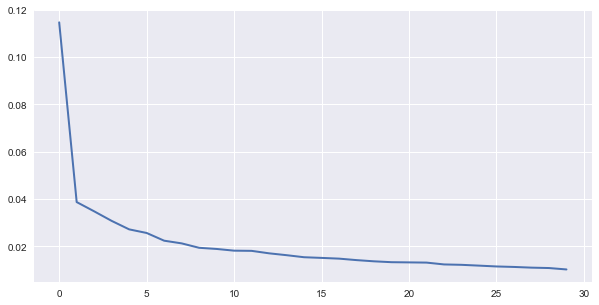

In [103]:
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


explained_ratio = []
# for n in range(len(df_x.columns)-1):
pca = PCA(n_components = 30)
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(X)

pca_trafo = pca.fit(z_data)
explained_ratio.append(pca.explained_variance_ratio_)
plt.figure(figsize=(10,5))

plt.plot(pca.explained_variance_ratio_, linewidth=2)

# plt.xticks([i for i in range(30)])
# plt.grid()
# plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
# plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o');



In [71]:
len(pca_trafo.explained_variance_ratio_.cumsum()[pca_trafo.explained_variance_ratio_.cumsum()<0.5])

19

In [75]:
pca_trafo.explained_variance_ratio_

array([ 0.11471764,  0.03868749,  0.03477226,  0.03072779,  0.02714005,
        0.02561515,  0.02235116,  0.02121644,  0.01934605,  0.01886194,
        0.01813997,  0.01806045,  0.01702277,  0.0162315 ,  0.01539811,
        0.01510012,  0.01480272,  0.01416638,  0.01370553,  0.01340705,
        0.01327252,  0.01311093,  0.0124293 ,  0.01218773,  0.0118817 ,
        0.01149741,  0.01131385,  0.01110975,  0.01100196,  0.01045002,
        0.01019297,  0.01006134,  0.00986182,  0.00966858,  0.00943518,
        0.00911646,  0.00877393,  0.00865526,  0.008407  ,  0.00834361,
        0.0081574 ,  0.00784644,  0.00778763,  0.0077477 ,  0.00742804,
        0.00738238,  0.00727364,  0.00687247,  0.00676152,  0.00671359,
        0.00645007,  0.0062929 ,  0.00618326,  0.00616452,  0.00608197,
        0.00581715,  0.0056844 ,  0.005507  ,  0.00541939,  0.00537057,
        0.00514645,  0.00500714,  0.00495364,  0.00485034,  0.00480422,
        0.00464943,  0.00456524,  0.00442572,  0.00439906,  0.00

In [55]:
X.shape[1]

130

C:\Users\parha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\parha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\parha\Anaconda3\lib\site-packages\matplotlib\colors.py:860: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\parha\Anaconda3\lib\site-packages\matplotlib\colors.py:861: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Users\parha\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


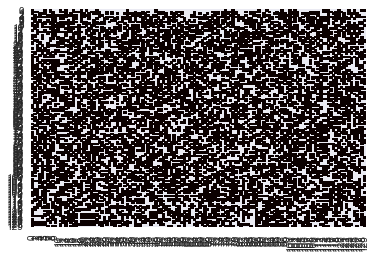

In [99]:
import seaborn as sns
sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(z_data.shape[1]))), cmap="hot", cbar=False)
plt.figure(figsize=(50,50))


In [46]:
PCA()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.explained_variance_ratio_

array([  9.94632103e-01,   3.65720126e-03,   1.43912360e-03,
         1.26710260e-04,   2.48028309e-05,   1.47111427e-05,
         1.14652346e-05,   7.73109815e-06,   6.76277967e-06,
         5.81559268e-06,   4.72750035e-06,   4.13264553e-06,
         3.79472275e-06,   3.20217636e-06,   2.97436796e-06,
         2.74305001e-06,   2.47536992e-06,   2.32842173e-06,
         2.28912391e-06,   2.04041529e-06])

In [15]:
pca.components_

array([[ -7.25570818e-05,  -8.32785908e-05,   1.65941567e-04,
          2.20091844e-05,  -3.21150784e-05,   0.00000000e+00,
          1.86171782e-04,   1.22453342e-04,  -9.65573904e-05,
          1.83646105e-05,  -2.52997423e-05,   7.93160917e-01,
          6.08994801e-01,   0.00000000e+00,   9.70817672e-07,
         -1.78737840e-05,   1.31056861e-03,   3.97746446e-03,
          1.27725384e-03,  -1.96705950e-04,   1.77344561e-05,
         -1.58193968e-05,   1.43141172e-05,   1.97933412e-04,
         -1.74566382e-05,  -3.44532993e-04,   6.65854849e-05,
         -3.04185657e-05,  -1.03900709e-04,  -7.46868916e-05,
         -4.43760190e-05,  -2.15185867e-05,  -1.57944908e-05,
          2.15134765e-05,  -3.83059456e-05,  -1.08465525e-04,
         -4.64066468e-06,   1.32862370e-04,  -4.05856101e-05,
         -1.62822577e-05,   7.58708709e-06,  -6.46423494e-05,
          9.28555031e-06,   2.75201675e-06,   4.78169499e-05,
         -2.07073407e-06,  -1.28178559e-05,  -3.75260883e-05,
        

In [76]:
pca.components_[0]

array([ -7.25570818e-05,  -8.32785908e-05,   1.65941567e-04,
         2.20091844e-05,  -3.21150784e-05,   0.00000000e+00,
         1.86171782e-04,   1.22453342e-04,  -9.65573904e-05,
         1.83646105e-05,  -2.52997423e-05,   7.93160917e-01,
         6.08994801e-01,   0.00000000e+00,   9.70817672e-07,
        -1.78737840e-05,   1.31056861e-03,   3.97746446e-03,
         1.27725384e-03,  -1.96705950e-04,   1.77344561e-05,
        -1.58193968e-05,   1.43141172e-05,   1.97933412e-04,
        -1.74566382e-05,  -3.44532993e-04,   6.65854849e-05,
        -3.04185657e-05,  -1.03900709e-04,  -7.46868916e-05,
        -4.43760190e-05,  -2.15185867e-05,  -1.57944908e-05,
         2.15134765e-05,  -3.83059456e-05,  -1.08465525e-04,
        -4.64066468e-06,   1.32862370e-04,  -4.05856101e-05,
        -1.62822577e-05,   7.58708709e-06,  -6.46423494e-05,
         9.28555031e-06,   2.75201675e-06,   4.78169499e-05,
        -2.07073407e-06,  -1.28178559e-05,  -3.75260883e-05,
         2.28796012e-05,

In [68]:
len(pca.explained_variance_ratio_[pca.explained_variance_ratio_>(10e-5a)])

4

## Plots and images

In [175]:
df_base = df

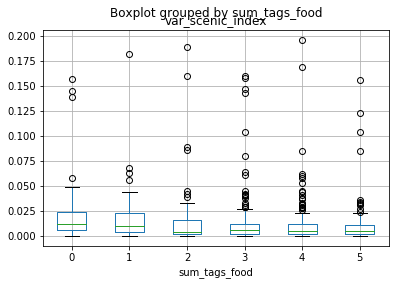

In [83]:
df_long.boxplot(column='var_scenic_index', by='sum_tags_food')

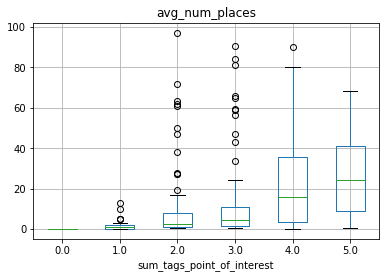

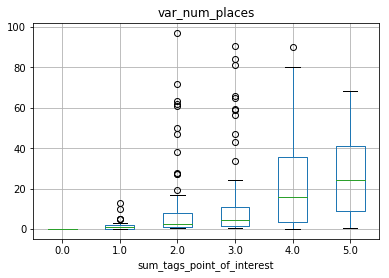

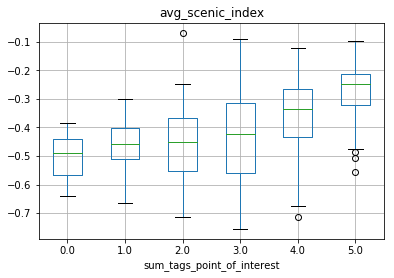

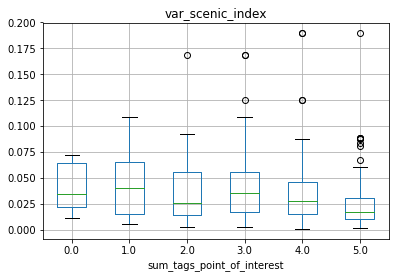

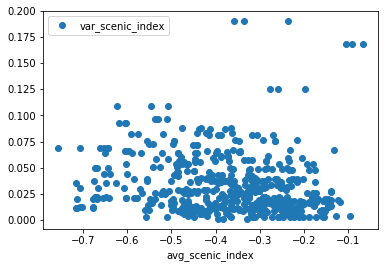

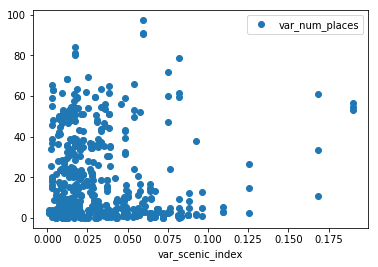

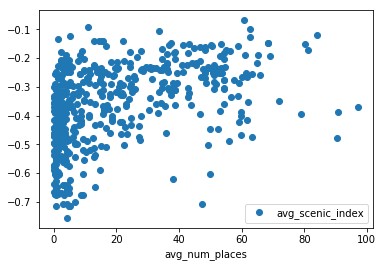

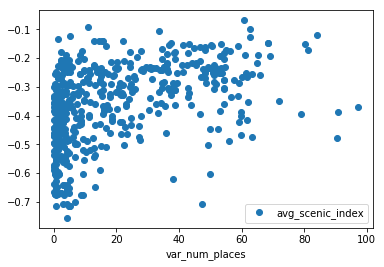

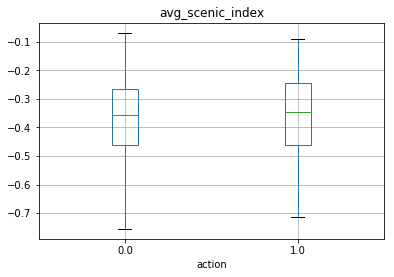

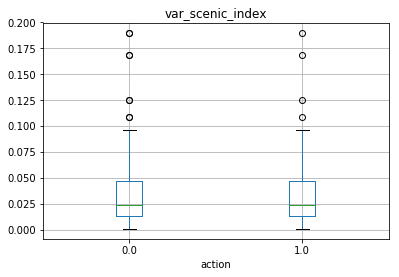

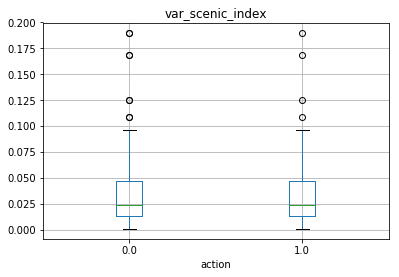

In [176]:
%matplotlib inline
df_base['sum_tags_point_of_interest'] = df_base.sum_tags_point_of_interest.astype('float')
df_base['var_num_places'] = df_base.var_num_places.astype('float')
df_base['avg_num_places'] = df_base.var_num_places.astype('float')

df_base.boxplot(column ='avg_num_places', by= 'sum_tags_point_of_interest')
plt.suptitle('')
df_base.boxplot(column ='var_num_places', by= 'sum_tags_point_of_interest')
plt.suptitle('')

df_base.boxplot(column ='avg_scenic_index', by= 'sum_tags_point_of_interest')
plt.suptitle('')

df_base.boxplot(column ='var_scenic_index', by= 'sum_tags_point_of_interest')
plt.suptitle('')

df_base.plot(y ='var_scenic_index', x= 'avg_scenic_index',style  = 'o')
plt.suptitle('')

df_base.plot(y ='var_num_places', x= 'var_scenic_index',style  = 'o')
plt.suptitle('')

df_base.plot(y ='avg_scenic_index', x= 'avg_num_places',style  = 'o')
plt.suptitle('')

df_base.plot(y ='avg_scenic_index', x= 'var_num_places',style  = 'o')
plt.suptitle('')

df_base.boxplot(column ='avg_scenic_index', by= 'action')
plt.suptitle('')

df_base.boxplot(column ='var_scenic_index', by= 'action')
plt.suptitle('')


df_base.boxplot(column ='var_scenic_index', by= 'action')
plt.suptitle('')




In [ ]:
df_base.sum_tags_florist = df_base.sum_tags_florist.astype('float')
df_base.sum_tags_florist.hist()

In [ ]:
%matplotlib inline
df_base.boxplot(column = 'var_scenic_index', by=['purpose_education'])
df_base.boxplot(column = 'avg_scenic_index', by=['purpose_education'])
df_base.boxplot(column = 'avg_scenic_index', by=['purpose_leisure'])
df_base.boxplot(column = 'var_scenic_index', by=['purpose_leisure'])
df_base.boxplot(column = 'var_scenic_index', by=['purpose_leisure'])
df_base.boxplot(column = 'var_scenic_index', by='purpose_other')
df_base.boxplot(column = 'avg_scenic_index', by='purpose_other')
df_base.boxplot(column = 'var_scenic_index', by='purpose_health')
df_base.boxplot(column = 'avg_scenic_index', by='purpose_health')

df_base.boxplot(column = 'var_scenic_index', by='purpose_meal_snack_coffee')
df_base.boxplot(column = 'avg_scenic_index', by='purpose_meal_snack_coffee')





In [ ]:
%matplotlib inline
df_base[df_base['action']==1].boxplot(column = 'var_scenic_index', by=['purpose_education'])
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'avg_scenic_index', by=['purpose_education'])
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'avg_scenic_index', by=['purpose_leisure'])
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'var_scenic_index', by=['purpose_leisure'])
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'var_scenic_index', by=['purpose_leisure'])
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'var_scenic_index', by='purpose_other')
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'avg_scenic_index', by='purpose_other')
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'var_scenic_index', by='purpose_health')
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'avg_scenic_index', by='purpose_health')
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'var_scenic_index', by='purpose_meal_snack_coffee')
plt.suptitle('')

df_base[df_base['action']==1].boxplot(column = 'avg_scenic_index', by='purpose_meal_snack_coffee')
plt.suptitle('')


In [ ]:
df_purpose = pd.read_sql('select * from processed_10_2_2018',conn)

for trip_index in df_purpose.trip_index.unique():
    df_sub = df_purpose[df_purpose.trip_index == trip_index]
    i = df_sub[df_sub.overlap_percentage == df_sub.overlap_percentage.max()].index
    df_purpose.loc[i,'action'] = 1
df_purpose.fillna(value = 0, inplace=True)

In [ ]:
%matplotlib inline
df_base.boxplot(by = 'action',column ='numpoints')

In [ ]:
%matplotlib inline
df_base.boxplot(by = 'action',column ='numpoints')
plt.suptitle('')


In [ ]:
%matplotlib inline
df_purpose.var_scenic_index.astype('float', inplace = True)
df_purpose[df_purpose['action']==1].boxplot(column = 'var_scenic_index', by='purpose')
df_purpose[df_purpose['action']==0].boxplot(column = 'var_scenic_index', by='purpose')

df_purpose[df_purpose['action']==1].boxplot(column = 'avg_scenic_index', by='purpose')
df_purpose[df_purpose['action']==0].boxplot(column = 'avg_scenic_index', by='purpose')



In [ ]:
%matplotlib inline
df_base.plot(x= 'avg_rating_avg',y ='avg_scenic_index',style = 'o')
df_base.plot(x= 'var_rating_average',y ='avg_scenic_index',style = 'o')
df_base.plot(x= 'avg_rating_avg',y ='var_scenic_index',style = 'o')
df_base.plot(x= 'var_rating_average',y ='var_scenic_index',style = 'o')


In [ ]:
%matplotlib inline
df_base.boxplot(column='var_rating_average',by = 'sum_tags_point_of_interest')
df_base.boxplot(column='avg_rating_avg',by = 'sum_tags_point_of_interest')

In [ ]:
%matplotlib inline
df_base.plot(x='var_rating_average',y = 'avg_scenic_index',style = 'o')
df_base.plot(x='avg_rating_avg',y = 'avg_scenic_index', style = 'o')
df_base.plot(x='var_rating_average',y = 'var_scenic_index',style = 'o')
df_base.plot(x='var_rating_average',y = 'var_scenic_index',style = 'o')



In [ ]:
%matplotlib inline
df_base.avg_scenic_index[df_base.purpose_education ==0].hist()


In [ ]:
df_base.purpose_leisure[ df_base.purpose_leisure > 0 ].count()


In [ ]:
df_base.purpose_meal_snack_coffee[ df_base.purpose_meal_snack_coffee > 0 ].count()

In [ ]:
df_base.purpose_other[ df_base.purpose_other > 0 ].count()

In [ ]:
df_base.boxplot(column = 'numpoints',by = 'action')
plt.title('pedestrian lights - route choice')
plt.suptitle("")

In [ ]:
df_base.boxplot(column = 'number_of_turns',by = 'action')


In [ ]:
df_base.head()

In [ ]:
df_base.loc[(df_base['most_beautiful_alternative']==1) & (df_base['action']==1) & (df_base['shortest_path'] == 0)]

In [ ]:
df_base.loc[(df_base['most_beautiful_alternative']==1) & (df_base['action']==1) &  (df_base['shortest_path']==1)]

In [ ]:
df_base.loc[(df_base['most_beautiful_alternative']==0) & (df_base['action']==1) &  (df_base['shortest_path']==1)]

In [ ]:
df_base.loc[(df_base['most_beautiful_alternative']==0) & (df_base['action']==1) &  (df_base['shortest_path']==0)]

In [ ]:
df_base.loc[(df_base['most_beautiful_alternative']==0) & (df_base['action']==1) &  (df_base['shortest_path']==0)]

In [ ]:
df_base.loc[(df_base['most_beautiful_alternative']==1) & (df_base['action']==1) &  (df_base['shortest_path']==1) & (df_base['purpose_education']==1)]

In [ ]:
df_base.loc[df_base.trip_index[df_base['alternative_no'] == 2]]
# df_to_sql('processed_three_alternative',df_base.loc[df_base.trip_index[df_base['alternative_no'] == 2]])

## Extras

### Plotting informations

In [75]:
l = ['age_16_24', 'age_25_34', 'age_35_44', 'age_45_54', 'age_55_64','age_65']


In [86]:
df.filter(like = 'purpose_').sum()/3

purpose_education             87.0
purpose_health                 6.0
purpose_leisure               21.0
purpose_meal_snack_coffee     13.0
purpose_other                110.0
purpose_pick_up                3.0
dtype: float64

In [83]:
df[l].sum()/3

age_16_24    47.0
age_25_34    74.0
age_35_44    53.0
age_45_54    53.0
age_55_64    13.0
age_65        0.0
dtype: float64

In [107]:
import io
import matplotlib.pyplot as plt
from PySide.QtGui import QApplication, QImage

def add_clipboard_to_figures():
    # use monkey-patching to replace the original plt.figure() function with
    # our own, which supports clipboard-copying
    oldfig = plt.figure

    def newfig(*args, **kwargs):
        fig = oldfig(*args, **kwargs)
        def clipboard_handler(event):
            if event.key == 'ctrl+c':
                # store the image in a buffer using savefig(), this has the
                # advantage of applying all the default savefig parameters
                # such as background color; those would be ignored if you simply
                # grab the canvas using Qt
                buf = io.BytesIO()
                fig.savefig(buf)
                QApplication.clipboard().setImage(QImage.fromData(buf.getvalue()))
                buf.close()

        fig.canvas.mpl_connect('key_press_event', clipboard_handler)
        return fig

    plt.figure = newfig

add_clipboard_to_figures()

ModuleNotFoundError: No module named 'PySide'

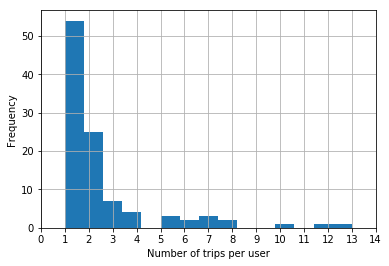

In [119]:
df_long.groupby(by = 'uuid').sum().action.hist(bins = 15)
plt.xlabel('Number of trips per user')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15)])

plt.savefig('Frequency of trips recorded per unique user')